# Load dataset & preprocessing

In [141]:
import pandas as pd
import numpy as np
import os

root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza2.csv"
exp_dir = "datasets/infuluenza/vecLSTMx2/"

if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)

df = pd.read_csv(data_path)

In [142]:
df[["Flucases", "Tempave", "Rh", "Rainfall"]].describe()

,Flucases,Tempave,Rh,Rainfall
count,48880.000000,48880.000000,48880.000000,1040.000000
mean,523.660495,15.686540,69.011498,31.407692
std,1421.128437,8.489355,8.936186,41.329507
min,0.000000,-7.485714,28.000000,0.000000
25%,1.000000,8.257143,63.285714,3.500000
50%,21.000000,16.242857,69.571429,18.000000
75%,338.000000,22.914286,75.342857,43.625000
max,26635.000000,32.071429,97.285714,337.500000


In [143]:
df_tokyo = df[df['regnames'].isin(["Tokyo"])]

df_tokyo.head()

,Alltime,Time,region,regnames,Longitude,Latitude,Altitude,Year,Month,Week,Flucases,Holiday,Tempave,Tempmin,Tempmax,Rh,Rainfall
12480,12481,1,13,Tokyo,35.689185,139.691648,34.9,2000,1,1,818,2,9.528571,6.371429,13.385714,50.571429,1.0
12481,12482,2,13,Tokyo,35.689185,139.691648,34.9,2000,1,2,1167,3,8.642857,5.457143,12.000000,61.142857,41.5
12482,12483,3,13,Tokyo,35.689185,139.691648,34.9,2000,1,3,2562,2,6.828571,4.171429,9.500000,56.000000,24.0
12483,12484,4,13,Tokyo,35.689185,139.691648,34.9,2000,1,4,3781,2,5.342857,1.542857,9.400000,42.000000,0.0
12484,12485,5,13,Tokyo,35.689185,139.691648,34.9,2000,1,5,3903,2,7.214286,3.171429,11.585714,38.714286,0.0


In [144]:
import matplotlib.pyplot as plt

In [145]:
train_n = int(len(df_tokyo["Flucases"])*0.75)
test_n = int(len(df_tokyo["Flucases"])*0.25)
train_n, test_n

(780, 260)

In [146]:
train_steps = np.arange(train_n)
test_steps = np.arange(train_n,train_n + test_n)

In [147]:
columns = ["Flucases","Tempave", "Rh", "Holiday", "Rainfall"]

all_data = df_tokyo[columns]

In [148]:
train_df = all_data[columns][0:train_n]
test_df = all_data[columns][train_n:train_n+test_n]

In [149]:
train_df.head()

,Flucases,Tempave,Rh,Holiday,Rainfall
12480,818,9.528571,50.571429,2,1.0
12481,1167,8.642857,61.142857,3,41.5
12482,2562,6.828571,56.000000,2,24.0
12483,3781,5.342857,42.000000,2,0.0
12484,3903,7.214286,38.714286,2,0.0


In [150]:
test_df.head()

,Flucases,Tempave,Rh,Holiday,Rainfall
13260,3809,5.357143,47.142857,3,6.5
13261,9892,6.285714,38.285714,2,35.5
13262,8198,5.628571,53.857143,3,19.0
13263,9625,6.771429,63.714286,2,31.5
13264,7844,4.228571,49.000000,2,9.0


trainとtestのdfを作る

In [151]:
train_ts_df = train_df["Flucases"]
train_ys_df = train_df[["Tempave", "Rh"]]
train_zs_df = train_df[["Rainfall"]]
train_xs_df = train_df["Holiday"]

test_ts_df = test_df["Flucases"]
test_ys_df = test_df[["Tempave", "Rh", "Rainfall"]]
test_xs_df = test_df["Holiday"]

In [152]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()

std_scaler.fit(train_ys_df)
train_scaled_ys = std_scaler.transform(train_ys_df)

In [153]:
import joblib

joblib.dump(std_scaler, exp_dir + 'std_scaler.joblib')

['datasets/infuluenza/vecLSTMx2/std_scaler.joblib']

In [154]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

train_scaled_ts = (np.array(train_ts_df) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

(array([596.,  46.,  33.,  20.,  10.,  13.,  11.,   4.,  12.,   6.,   2.,
          5.,   3.,   2.,   1.,   4.,   1.,   2.,   3.,   1.,   0.,   0.,
          3.,   0.,   2.]),
 array([0.     , 0.25252, 0.50504, 0.75756, 1.01008, 1.2626 , 1.51512,
        1.76764, 2.02016, 2.27268, 2.5252 , 2.77772, 3.03024, 3.28276,
        3.53528, 3.7878 , 4.04032, 4.29284, 4.54536, 4.79788, 5.0504 ,
        5.30292, 5.55544, 5.80796, 6.06048, 6.313  ]),
 <BarContainer object of 25 artists>)

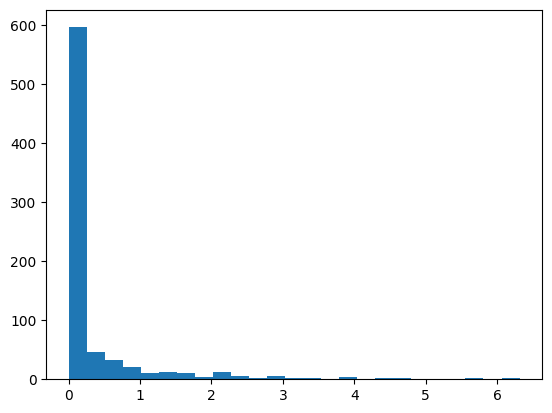

In [155]:
plt.hist(train_scaled_ts,bins=25)

In [156]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 500

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 10

train_scaled_zs = (np.array(train_zs_df) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

(array([336., 129., 100.,  66.,  46.,  29.,  12.,  25.,   8.,   5.,   6.,
          3.,   3.,   2.,   1.,   2.,   1.,   1.,   3.,   0.,   1.,   0.,
          0.,   0.,   1.]),
 array([0.    , 0.2648, 0.5296, 0.7944, 1.0592, 1.324 , 1.5888, 1.8536,
        2.1184, 2.3832, 2.648 , 2.9128, 3.1776, 3.4424, 3.7072, 3.972 ,
        4.2368, 4.5016, 4.7664, 5.0312, 5.296 , 5.5608, 5.8256, 6.0904,
        6.3552, 6.62  ]),
 <BarContainer object of 25 artists>)

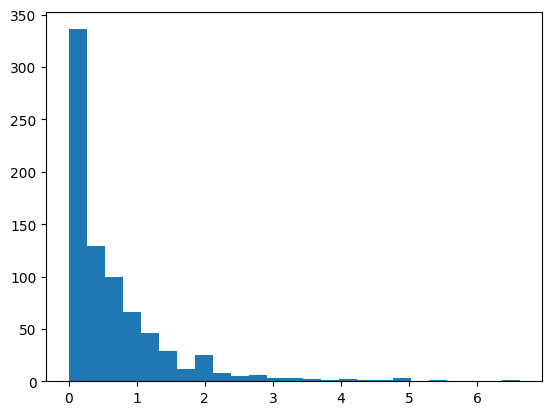

In [157]:
plt.hist(train_scaled_zs,bins=25)

In [158]:
train_scaled_zs.shape, train_scaled_ys.shape

((780, 1), (780, 2))

In [159]:
train_scaled_ys = np.concatenate([train_scaled_ys, train_scaled_zs], 1)

In [160]:
train_ts_np, train_ys_np, train_xs_np = train_scaled_ts, train_scaled_ys, np.array(train_xs_df)
test_ts_np, test_ys_np, test_xs_np = np.array(test_ts_df), np.array(test_ys_df), np.array(test_xs_df)

In [161]:
train_ts_np.shape, train_ys_np.shape, train_xs_np.shape

((780,), (780, 3), (780,))

# Make Dataset

In [162]:
train_np = np.concatenate([train_ts_np.reshape(-1,1), train_ys_np, train_xs_np.reshape(-1,1)], axis = 1)
test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

In [163]:
train_np.shape, test_np.shape

((780, 5), (260, 5))

In [164]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [165]:
#何週前のデータから予測するか

seq_length = 13

train_Xs, train_ys = make_sequence_data(train_np, seq_length)

In [166]:
train_Xs.shape, train_ys.shape

((767, 13, 5), (767, 1, 5))

In [167]:
np.save(exp_dir + "train_X_" + str(seq_length) + "w.npy", train_Xs)
np.save(exp_dir + "train_y_" + str(seq_length) + "w.npy", train_ys)

In [168]:
np.save(exp_dir + "train_np.npy", train_np)
np.save(exp_dir + "test_np.npy", test_np)

# Dataset and DataLoader

In [133]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch
import torch.nn as nn
from torch.nn import Sequential, Linear, Tanh, Sigmoid, LeakyReLU, ReLU
import torch.nn.functional as F
import torch.optim as optim

import numpy as np #数値計算用ライブラリ
import matplotlib.pyplot as plt #描画用ライブラリ

In [134]:
root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza2.csv"
exp_dir = "datasets/infuluenza/vecLSTMx2/"

In [135]:
train_Xs = np.load(exp_dir + "train_X_" + str(seq_length) + "w.npy")
train_ys = np.load(exp_dir + "train_y_" + str(seq_length) + "w.npy")

In [136]:
train_Xs.shape, train_ys.shape

((767, 13, 5), (767, 1, 5))

In [137]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(exp_dir + 'std_scaler.joblib')

In [138]:
import pandas as pd

labels = train_ys[:,:,0]
print(labels[:,0].shape)
binned_labels = pd.qcut(labels[:,0], q=10, labels=False, duplicates='drop')

(767,)


In [139]:
import numpy as np
from sklearn.model_selection import train_test_split

train_Xs, val_Xs, train_ys, val_ys = train_test_split(
    train_Xs, train_ys, test_size=0.20, stratify=binned_labels, random_state=42
)

In [140]:
np.save(exp_dir + "train_Xs_" + str(seq_length) + "w.npy", train_Xs)
np.save(exp_dir + "train_ys_" + str(seq_length) + "w.npy", train_ys)
np.save(exp_dir + "val_Xs_" + str(seq_length) + "w.npy", val_Xs)
np.save(exp_dir + "val_ys_" + str(seq_length) + "w.npy", val_ys)

In [32]:
trn_xs_tensor = torch.Tensor(train_Xs)
trn_ys_tensor = torch.Tensor(train_ys)

val_xs_tensor = torch.Tensor(val_Xs)
val_ys_tensor = torch.Tensor(val_ys)

In [33]:
trn_xs_tensor.shape, trn_ys_tensor.shape, val_xs_tensor.shape, val_ys_tensor.shape

(torch.Size([592, 40, 4]),
 torch.Size([592, 1, 4]),
 torch.Size([148, 40, 4]),
 torch.Size([148, 1, 4]))

In [34]:
from torch.utils.data import TensorDataset, DataLoader

trn_dataset = TensorDataset(trn_xs_tensor, trn_ys_tensor)
trn_loader = DataLoader(dataset=trn_dataset,batch_size=50,shuffle=True)

val_dataset = TensorDataset(val_xs_tensor, val_ys_tensor)
val_loader = DataLoader(dataset=val_dataset,batch_size=50,shuffle=False)

In [35]:
for id, batch_data in enumerate(trn_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
1 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
2 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
3 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
4 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
5 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
6 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
7 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
8 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
9 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
10 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
11 torch.Size([42, 40, 4]) torch.Size([42, 1, 4])


In [36]:
for id, batch_data in enumerate(val_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
1 torch.Size([50, 40, 4]) torch.Size([50, 1, 4])
2 torch.Size([48, 40, 4]) torch.Size([48, 1, 4])


In [37]:
#train_ts_df = train_df["Flucases"]
#train_ys_df = train_df[["Tempave", "Rh"]]
#train_xs_df = train_df["Holiday"]

#train_np = np.concatenate([train_ts_np.reshape(-1,1), train_ys_np, train_xs_np.reshape(-1,1)], axis = 1)

# LSTM model

In [22]:
class cLSTM(nn.Module):
    def __init__(self, input_size = 4, hidden_size=32, cond_size = 1, output_size=4, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.cond_size = cond_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2)
        
        self.cfc1 = nn.Linear(self.cond_size, int(self.hidden_size / 2))
        self.cfc2 = nn.Linear(int(self.hidden_size / 2), int(self.hidden_size / 4))
        
        self.fc1 = nn.Linear(int(self.hidden_size / 4) + self.hidden_size, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x, cin):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden)
        outs = last_outs[:, -1, :] #(batch_size, hidden)
        
        ch1 = self.relu(self.cfc1(cin))
        ch2 = self.cfc2(ch1)
        
        h_list = [outs, ch2]
        h1 = torch.cat(h_list, dim=1)
        h2 = self.relu(self.fc1(h1))
        h3 = self.fc2(h2)
        
        y_list = [self.relu(h3[:,0:1]), h3[:,1:3]]
        ys = torch.cat(y_list, dim=1)

        return ys

In [23]:
model = cLSTM(input_size = 4, hidden_size = 32, cond_size = 1, output_size = 3, num_layers = 2)

## Prediction

In [40]:
batch_0x = list(trn_loader)[0][0]
batch_0c = list(trn_loader)[0][1]

In [41]:
batch_0x.shape, batch_0c.shape

(torch.Size([50, 40, 4]), torch.Size([50, 1, 4]))

In [42]:
batch_0c = torch.reshape(batch_0c[:,:,-1], (batch_0c.shape[0], 1))

In [43]:
batch_0c.shape

torch.Size([50, 1])

In [44]:
preds = model(batch_0x, batch_0c)

In [45]:
preds.shape

torch.Size([50, 3])

## Train

In [48]:
model.cuda()

cLSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(4, 32, num_layers=2, dropout=0.2)
  (cfc1): Linear(in_features=1, out_features=16, bias=True)
  (cfc2): Linear(in_features=16, out_features=8, bias=True)
  (fc1): Linear(in_features=40, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [49]:
criterion = nn.MSELoss(reduction='none').cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [50]:
def val_model(epoch):
    
    model.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()
                input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))

            preds = model(inputs, input_c)
            true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
            loss = criterion(preds, true_ys).mean(dim=0).mean()
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [51]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    model.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        optimizer.zero_grad()
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        loss = criterion(preds, true_ys).mean(dim=0).mean()
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_model" + ".pt"
        torch.save(model, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.9380756616592407 Val loss:  0.9469261368115743
epoch:  1 Train loss:  0.9223511616388956 Val loss:  0.934403638044993
epoch:  2 Train loss:  0.9019084970156351 Val loss:  0.9105706214904785
epoch:  3 Train loss:  0.8608552515506744 Val loss:  0.8366574843724569
epoch:  4 Train loss:  0.7288641730944315 Val loss:  0.607100377480189
epoch:  5 Train loss:  0.48473139107227325 Val loss:  0.3577019174893697
epoch:  6 Train loss:  0.37588221579790115 Val loss:  0.3337817390759786
epoch:  7 Train loss:  0.348151250431935 Val loss:  0.3223853011926015
epoch:  8 Train loss:  0.33569009974598885 Val loss:  0.31249184409777325
epoch:  9 Train loss:  0.31454875071843463 Val loss:  0.28818170229593915
epoch:  10 Train loss:  0.2908233342071374 Val loss:  0.2710527578989665
epoch:  11 Train loss:  0.27277278775970143 Val loss:  0.2582344214121501
epoch:  12 Train loss:  0.26431839913129807 Val loss:  0.24351067344347635
epoch:  13 Train loss:  0.26021140317122143 Val loss:  

epoch:  113 Train loss:  0.18058698376019797 Val loss:  0.1656403342882792
epoch:  114 Train loss:  0.18910350650548935 Val loss:  0.16492020587126413
epoch:  115 Train loss:  0.18837048982580504 Val loss:  0.16335448125998178
epoch:  116 Train loss:  0.18296710525949797 Val loss:  0.16615323722362518
epoch:  117 Train loss:  0.18665137017766634 Val loss:  0.16578972339630127
epoch:  118 Train loss:  0.18374269331494966 Val loss:  0.16452912986278534
epoch:  119 Train loss:  0.18732590849200884 Val loss:  0.16391975184281668
epoch:  120 Train loss:  0.18812783310810724 Val loss:  0.16255547106266022
epoch:  121 Train loss:  0.1871402362982432 Val loss:  0.1671197066704432
epoch:  122 Train loss:  0.1913455786804358 Val loss:  0.16619176169236502
epoch:  123 Train loss:  0.188223568101724 Val loss:  0.16713830331961313
epoch:  124 Train loss:  0.186506366978089 Val loss:  0.16427547732988992
epoch:  125 Train loss:  0.18570167695482573 Val loss:  0.16780364016691843
epoch:  126 Train lo

epoch:  223 Train loss:  0.17957110206286112 Val loss:  0.1659193088610967
epoch:  224 Train loss:  0.1777338037888209 Val loss:  0.1627323180437088
epoch:  225 Train loss:  0.17747028296192488 Val loss:  0.16243128975232443
epoch:  226 Train loss:  0.18025499023497105 Val loss:  0.16244915127754211
epoch:  227 Train loss:  0.1745702102780342 Val loss:  0.1614679495493571
epoch:  228 Train loss:  0.17256854847073555 Val loss:  0.16162955264250436
epoch:  229 Train loss:  0.17631249191860357 Val loss:  0.1623901128768921
epoch:  230 Train loss:  0.17755097523331642 Val loss:  0.16269217928250632
epoch:  231 Train loss:  0.17724774653712908 Val loss:  0.161106805006663
epoch:  232 Train loss:  0.17836013808846474 Val loss:  0.16228151321411133
epoch:  233 Train loss:  0.1788402944803238 Val loss:  0.1607289065917333
epoch:  234 Train loss:  0.17897512267033258 Val loss:  0.16086439291636148
epoch:  235 Train loss:  0.17283916473388672 Val loss:  0.16457211474577585
epoch:  236 Train loss

epoch:  333 Train loss:  0.16540049389004707 Val loss:  0.16064470012982687
epoch:  334 Train loss:  0.17239971086382866 Val loss:  0.16139386594295502
epoch:  335 Train loss:  0.1683026241759459 Val loss:  0.1597209870815277
epoch:  336 Train loss:  0.17763478805621466 Val loss:  0.16049555937449136
epoch:  337 Train loss:  0.1744388540585836 Val loss:  0.15646020571390787
epoch:  338 Train loss:  0.17159958680470785 Val loss:  0.15983766317367554
epoch:  339 Train loss:  0.17415046753982702 Val loss:  0.15881889561812082
epoch:  340 Train loss:  0.17624377831816673 Val loss:  0.15880249937375387
epoch:  341 Train loss:  0.16724415868520737 Val loss:  0.16281132400035858
epoch:  342 Train loss:  0.17351284374793371 Val loss:  0.15980936090151468
epoch:  343 Train loss:  0.17893368192017078 Val loss:  0.15881724655628204
epoch:  344 Train loss:  0.17382095381617546 Val loss:  0.15914371609687805
epoch:  345 Train loss:  0.16919646660486856 Val loss:  0.16143675645192465
epoch:  346 Tra

epoch:  442 Train loss:  0.167261961226662 Val loss:  0.1558632254600525
epoch:  443 Train loss:  0.16467367733518282 Val loss:  0.16102543969949087
epoch:  444 Train loss:  0.1697386863331 Val loss:  0.15722265342871347
epoch:  445 Train loss:  0.1734141781926155 Val loss:  0.15787412226200104
epoch:  446 Train loss:  0.17019763216376305 Val loss:  0.1576663206020991
epoch:  447 Train loss:  0.1697010099887848 Val loss:  0.16475863258043924
epoch:  448 Train loss:  0.1733665963013967 Val loss:  0.15685750047365823
epoch:  449 Train loss:  0.16728059574961662 Val loss:  0.15494304895401
epoch:  450 Train loss:  0.17309057215849558 Val loss:  0.16900062561035156
epoch:  451 Train loss:  0.1715287578602632 Val loss:  0.16137591501077017
epoch:  452 Train loss:  0.1620166872938474 Val loss:  0.15801729261875153
epoch:  453 Train loss:  0.16848531924188137 Val loss:  0.15743025143941244
epoch:  454 Train loss:  0.16955084477861723 Val loss:  0.16059420506159464
epoch:  455 Train loss:  0.1

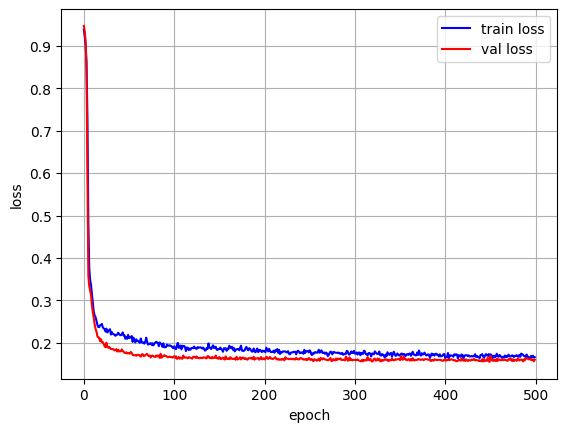

In [52]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [53]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(449, 0.15494304895401)

In [24]:
save_model_path = exp_dir + "best_model" + ".pt"

model = torch.load(save_model_path)

### Scatter plot

In [25]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

NameError: name 'trn_dataset' is not defined

In [ ]:
np.array(trues_list).shape, np.array(preds_list).shape

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする
plt.show()

In [26]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

NameError: name 'val_dataset' is not defined

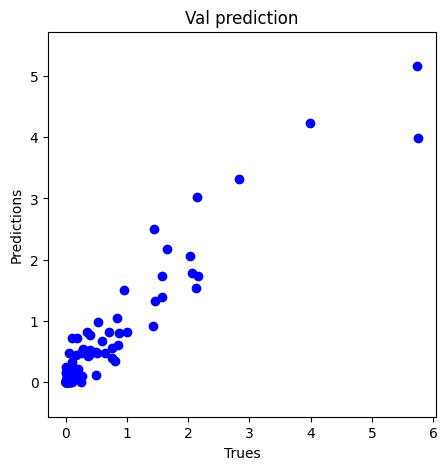

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする

plt.show()

## Test prediction

In [27]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(exp_dir + "train_np.npy")
test_np = np.load(exp_dir + "test_np.npy")

In [28]:
train_np.shape, test_np.shape

((780, 4), (260, 4))

In [29]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

In [30]:
test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [31]:
test_scaled_ys = std_scaler.transform(test_np[:,1:3])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
test_scaled_ys.shape, test_scaled_ts.reshape(-1,1).shape, test_np[:,-1].shape

((260, 2), (260, 1), (260,))

In [33]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

In [34]:
test_all_np.shape

(260, 4)

In [35]:
test_np[:,-1].shape, test_scaled_ts.shape, test_scaled_ys.shape, test_np.shape

((260,), (260,), (260, 2), (260, 4))

### 1. Prediction based on results from 40 days ago

In [36]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [37]:
#何週前のデータから予測するか

seq_length = 40

test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [38]:
tst_xs_tensor = torch.Tensor(test_Xs)
tst_ys_tensor = torch.Tensor(test_ys)

In [39]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [40]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219


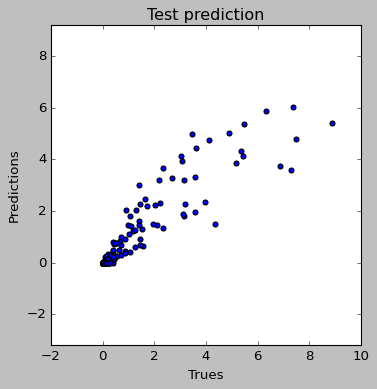

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画
plt.gca().set_aspect('equal', adjustable='datalim')

plt.show()

In [42]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [43]:
tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

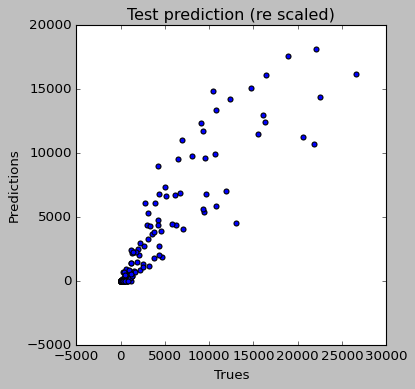

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [45]:
tst_preds.shape

(220, 1)

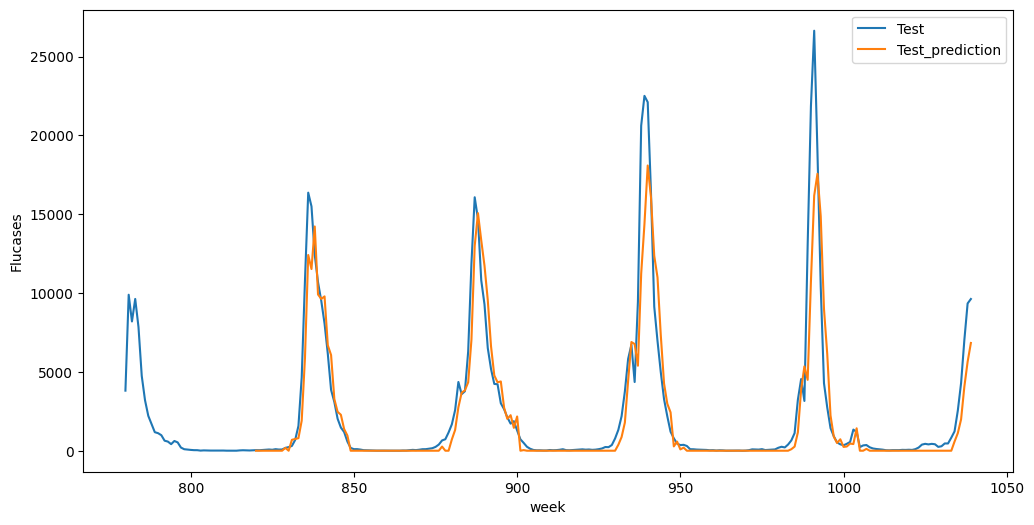

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n],label="Test")
plt.plot(test_steps[seq_length:], tst_preds,label="Test_prediction")

plt.xlabel("week")
plt.ylabel("Flucases")
plt.legend()

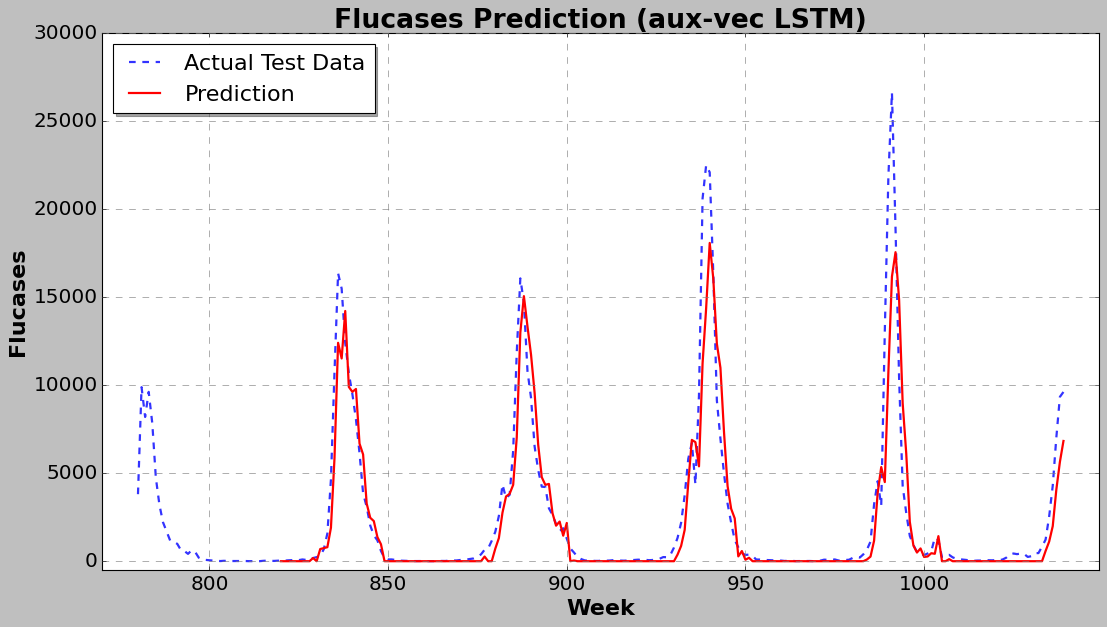

In [46]:
plt.figure(figsize=(14, 8))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=2, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length:], tst_preds, label="Prediction", linestyle='-', linewidth=2, color='red', alpha=1.0)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=20, fontweight='bold')
plt.ylabel("Flucases", fontsize=20, fontweight='bold')
plt.title("Flucases Prediction (aux-vec LSTM)", fontsize=24, fontweight='bold')

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 凡例の調整
plt.legend(fontsize=20, loc='upper left', frameon=True, shadow=True)
plt.ylim(bottom=-500)
plt.xlim(left=min(test_steps) - 10, right = max(test_steps) + 10)

# 仕上げ
plt.tight_layout()
plt.savefig("Flucases Prediction (aux-vec LSTM).jpg", dpi=200, bbox_inches='tight', format='jpg')
plt.show()

In [81]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [82]:
reg_metric(test_np[seq_length:,0], tst_preds[:,0], "Flucases")

Flucases
MSE : 3646084.7400411074.
RMSE : 1909.472372159678.
MAE : 849.766976998069.
R2 : 0.8422928700662378.
pearson : 0.9244685850388222 2.9633107153988063e-93


### 2. step by step prediction

In [80]:
len(tst_dataset)

220

In [81]:
init_dat = tst_dataset[0]

In [82]:
init_inputs, init_trues = init_dat

In [83]:
init_inputs.shape, init_trues.shape

(torch.Size([40, 4]), torch.Size([1, 4]))

In [84]:
init_inputs, init_trues = init_inputs.cuda(), init_trues.cuda()
        
init_inputs = torch.reshape(init_inputs, (1, seq_length, init_inputs.shape[-1]))
init_trues = torch.reshape(init_trues, (1, 1, init_trues.shape[-1]))
input_c = torch.reshape(init_trues[:,:,-1], (init_trues.shape[0], 1))
        
preds = model(init_inputs, input_c)

In [85]:
preds.shape, input_c.shape

(torch.Size([1, 3]), torch.Size([1, 1]))

In [86]:
preds_cat = torch.cat([preds, input_c], dim=1)

In [87]:
preds_cat = torch.reshape(preds_cat, (1, 1, preds_cat.shape[-1]))
preds_cat.shape

torch.Size([1, 1, 4])

In [88]:
init_inputs.shape

torch.Size([1, 40, 4])

In [89]:
stack_inputs = torch.cat([init_inputs, preds_cat], dim=1)

In [90]:
stack_inputs.shape

torch.Size([1, 41, 4])

In [91]:
test_np.shape

(260, 4)

In [92]:
from torch.utils.data import TensorDataset, DataLoader

#test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

tst_input_tensor = torch.from_numpy(test_np[:,-1].reshape(-1,1).astype(np.float32)).clone()
tst_input_dataset = TensorDataset(tst_input_tensor)

In [93]:
stack_inputs.shape, len(tst_input_dataset)

(torch.Size([1, 41, 4]), 260)

In [94]:
model.eval()

with torch.no_grad():
    for id, tst_input in enumerate(list(tst_input_dataset)[len(stack_inputs[0]):]):
        print(id)

        input_c = torch.reshape(tst_input[0], (tst_input[0].shape[0], 1)).cuda()

        preds = model(stack_inputs[:,-seq_length:,:].cuda(), input_c.cuda())
        preds_cat = torch.cat([preds, input_c], dim=1)

        preds_cat = torch.reshape(preds_cat, (1, 1, preds_cat.shape[-1]))
        stack_inputs = torch.cat([stack_inputs, preds_cat], dim=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218


In [95]:
stack_inputs.shape, len(tst_input_dataset)

(torch.Size([1, 260, 4]), 260)

In [96]:
ae_scaled_preds = stack_inputs[0][:,0].to('cpu').detach().numpy().copy()

In [97]:
ae_scaled_preds.shape

(260,)

In [98]:
test_scaled_ts.shape

(260,)

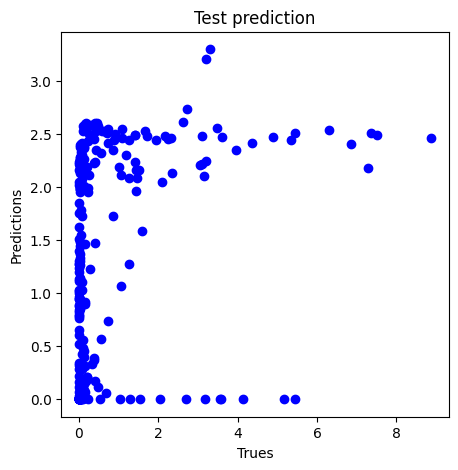

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_scaled_ts, ae_scaled_preds, c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [100]:
#rescaled_tst_trues = (np.array(test_scaled_ts) - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min
rescaled_tst_preds = (np.array(ae_scaled_preds) - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

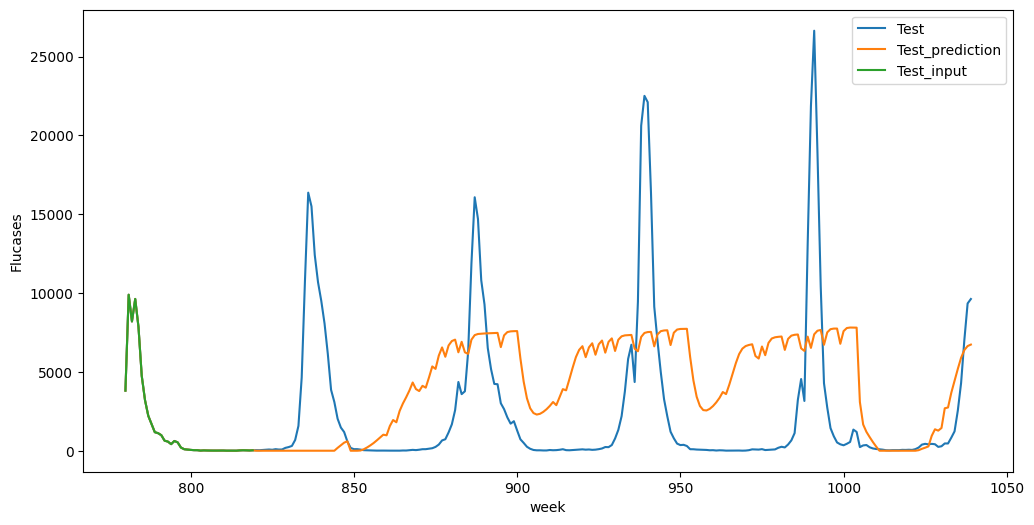

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n],label="Test")
plt.plot(test_steps, rescaled_tst_preds,label="Test_prediction")
plt.plot(test_steps[0:seq_length], rescaled_tst_preds[0:seq_length],label="Test_input")

plt.xlabel("week")
plt.ylabel("Flucases")
plt.legend()

# Bidirectional LSTM model

In [83]:
class bdcLSTM(nn.Module):
    def __init__(self, input_size = 4, hidden_size=32, cond_size = 1, output_size=4, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.cond_size = cond_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2, bidirectional=True)
        
        self.cfc = nn.Linear(self.cond_size, int(self.hidden_size / 4))
        
        self.fc1 = nn.Linear(int(self.hidden_size / 4) + self.hidden_size * 2, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x, cin):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden * 2)
        outs = last_outs[:, -1, :] #(batch_size, hidden * 2)
        
        ch = self.relu(self.cfc(cin))
        
        h_list = [outs, ch]
        h1 = torch.cat(h_list, dim=1)
        h2 = self.relu(self.fc1(h1))
        h3 = self.fc2(h2)
        
        y_list = [self.relu(h3[:,0:1]), h3[:,1:3]]
        ys = torch.cat(y_list, dim=1)

        return ys

In [84]:
bimodel = bdcLSTM(input_size = 4, hidden_size = 32, cond_size = 1, output_size = 3, num_layers = 2)

In [85]:
batch_0x = list(trn_loader)[0][0]
batch_0c = list(trn_loader)[0][1]

batch_0c = torch.reshape(batch_0c[:,:,-1], (batch_0c.shape[0], 1))

In [86]:
batch_0c.shape

torch.Size([50, 1])

In [87]:
preds = bimodel(batch_0x, batch_0c)

## Train

In [88]:
bimodel.cuda()

bdcLSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(4, 32, num_layers=2, dropout=0.2, bidirectional=True)
  (cfc): Linear(in_features=1, out_features=8, bias=True)
  (fc1): Linear(in_features=72, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [89]:
criterion = nn.MSELoss(reduction='none').cuda()
optimizer = optim.Adam(bimodel.parameters(), lr=1e-3)

In [90]:
def val_model(epoch):
    
    bimodel.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()
                input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))

            preds = bimodel(inputs, input_c)
            true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
            loss = criterion(preds, true_ys).mean(dim=0).mean()
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [91]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    bimodel.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        optimizer.zero_grad()
        
        preds = bimodel(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        loss = criterion(preds, true_ys).mean(dim=0).mean()
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_bimodel" + ".pt"
        torch.save(bimodel, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.9618216107288996 Val loss:  0.9728061755498251
epoch:  1 Train loss:  0.9406689604123434 Val loss:  0.9245594541231791
epoch:  2 Train loss:  0.8583179960648218 Val loss:  0.7812699675559998
epoch:  3 Train loss:  0.6744190429647764 Val loss:  0.517543892065684
epoch:  4 Train loss:  0.45736441512902576 Val loss:  0.36674217383066815
epoch:  5 Train loss:  0.36778005088369053 Val loss:  0.3373766491810481
epoch:  6 Train loss:  0.33512861281633377 Val loss:  0.31242160002390545
epoch:  7 Train loss:  0.2980753642817338 Val loss:  0.27752454578876495
epoch:  8 Train loss:  0.2722414880990982 Val loss:  0.25319216152032215
epoch:  9 Train loss:  0.26047031457225484 Val loss:  0.24616405367851257
epoch:  10 Train loss:  0.24614373594522476 Val loss:  0.22184295455614725
epoch:  11 Train loss:  0.22581753507256508 Val loss:  0.20127574602762857
epoch:  12 Train loss:  0.22843858102957407 Val loss:  0.19318552811940512
epoch:  13 Train loss:  0.22289172125359377 Val

epoch:  113 Train loss:  0.17626247803370157 Val loss:  0.1624020834763845
epoch:  114 Train loss:  0.1751212179660797 Val loss:  0.16176767647266388
epoch:  115 Train loss:  0.17463511725266775 Val loss:  0.15862890084584555
epoch:  116 Train loss:  0.182816115518411 Val loss:  0.16760816673437753
epoch:  117 Train loss:  0.17642577923834324 Val loss:  0.15936130285263062
epoch:  118 Train loss:  0.18011620392402014 Val loss:  0.15882953504721323
epoch:  119 Train loss:  0.18046167741219202 Val loss:  0.15901291370391846
epoch:  120 Train loss:  0.18117751802007356 Val loss:  0.15842815240224203
epoch:  121 Train loss:  0.17572777345776558 Val loss:  0.1587323248386383
epoch:  122 Train loss:  0.1830054223537445 Val loss:  0.16172381242116293
epoch:  123 Train loss:  0.17608007788658142 Val loss:  0.15904949605464935
epoch:  124 Train loss:  0.18096127236882845 Val loss:  0.1605335772037506
epoch:  125 Train loss:  0.1784895397722721 Val loss:  0.15990489721298218
epoch:  126 Train lo

epoch:  224 Train loss:  0.17044955243666968 Val loss:  0.15973225235939026
epoch:  225 Train loss:  0.16479595253864923 Val loss:  0.15859027206897736
epoch:  226 Train loss:  0.16991149634122849 Val loss:  0.15623900294303894
epoch:  227 Train loss:  0.16865671053528786 Val loss:  0.15670361618200937
epoch:  228 Train loss:  0.1700586024671793 Val loss:  0.16239035626252493
epoch:  229 Train loss:  0.17115247001250586 Val loss:  0.15812210738658905
epoch:  230 Train loss:  0.17427422230442366 Val loss:  0.15822883447011313
epoch:  231 Train loss:  0.16562097892165184 Val loss:  0.15815078218777975
epoch:  232 Train loss:  0.1662183441221714 Val loss:  0.16028931736946106
epoch:  233 Train loss:  0.17176997537414232 Val loss:  0.15829863647619882
epoch:  234 Train loss:  0.16762779280543327 Val loss:  0.16138201455275217
epoch:  235 Train loss:  0.1716782475511233 Val loss:  0.158709317445755
epoch:  236 Train loss:  0.1651207928856214 Val loss:  0.15920224289099374
epoch:  237 Train 

epoch:  335 Train loss:  0.16494745885332426 Val loss:  0.1589350402355194
epoch:  336 Train loss:  0.16593213068942228 Val loss:  0.157100111246109
epoch:  337 Train loss:  0.16273682191967964 Val loss:  0.15626215438048044
epoch:  338 Train loss:  0.16419214196503162 Val loss:  0.16008632878462473
epoch:  339 Train loss:  0.1658185012638569 Val loss:  0.1569059689839681
epoch:  340 Train loss:  0.1666351780295372 Val loss:  0.15961753825346628
epoch:  341 Train loss:  0.16597974362472692 Val loss:  0.15656816959381104
epoch:  342 Train loss:  0.16468806813160577 Val loss:  0.15826567510763803
epoch:  343 Train loss:  0.16706170017520586 Val loss:  0.16242754956086478
epoch:  344 Train loss:  0.16136434177557626 Val loss:  0.15968811511993408
epoch:  345 Train loss:  0.16158894697825113 Val loss:  0.159001757701238
epoch:  346 Train loss:  0.16169236662487188 Val loss:  0.15741831560929617
epoch:  347 Train loss:  0.16031758611400923 Val loss:  0.15885413189729056
epoch:  348 Train lo

epoch:  444 Train loss:  0.1627459612985452 Val loss:  0.16053755581378937
epoch:  445 Train loss:  0.1590006978561481 Val loss:  0.159976397951444
epoch:  446 Train loss:  0.15991128546496233 Val loss:  0.15845650931199393
epoch:  447 Train loss:  0.15860400162637234 Val loss:  0.1592339426279068
epoch:  448 Train loss:  0.16077487108608088 Val loss:  0.1576163818438848
epoch:  449 Train loss:  0.15461738407611847 Val loss:  0.1594271957874298
epoch:  450 Train loss:  0.1599261723458767 Val loss:  0.15834997594356537
epoch:  451 Train loss:  0.16022030947109064 Val loss:  0.16021731992562613
epoch:  452 Train loss:  0.1550308975080649 Val loss:  0.15995870033899942
epoch:  453 Train loss:  0.16049056500196457 Val loss:  0.16249811152617136
epoch:  454 Train loss:  0.15956690783301988 Val loss:  0.16052757700284323
epoch:  455 Train loss:  0.16000237067540488 Val loss:  0.1577919622262319
epoch:  456 Train loss:  0.16244870672623316 Val loss:  0.16525161763032278
epoch:  457 Train loss

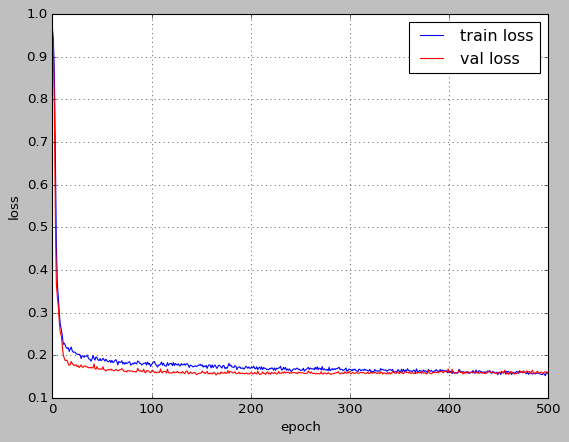

In [92]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [93]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(165, 0.154027650753657)

In [94]:
save_model_path = exp_dir + "best_bimodel" + ".pt"

bimodel = torch.load(save_model_path)

### Scatter plot

In [95]:
preds_list = []
trues_list = []

bimodel.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = bimodel(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

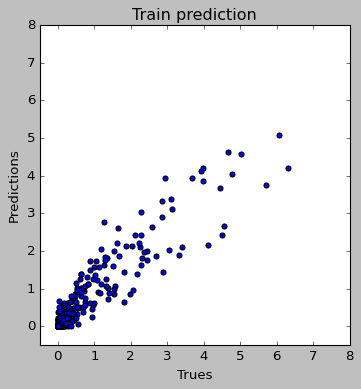

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 8)

plt.show()

In [97]:
preds_list = []
trues_list = []

bimodel.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = bimodel(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


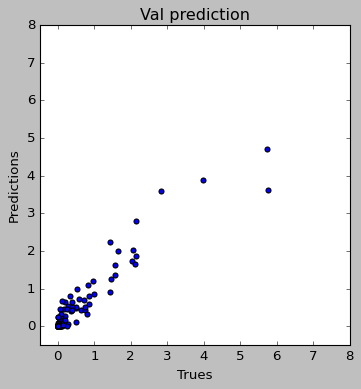

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 8)

plt.show()

## Test Prediction

In [99]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(exp_dir + "train_np.npy")
test_np = np.load(exp_dir + "test_np.npy")

In [100]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [101]:
test_scaled_ys = std_scaler.transform(test_np[:,1:3])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [102]:
test_scaled_ys.shape, test_scaled_ts.reshape(-1,1).shape, test_np[:,-1].shape

((260, 2), (260, 1), (260,))

In [103]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

### 1. Prediction based on results from 40 days ago

In [104]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [105]:
#何週前のデータから予測するか

seq_length = 40

test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [106]:
tst_xs_tensor = torch.Tensor(test_Xs)
tst_ys_tensor = torch.Tensor(test_ys)

In [107]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [108]:
preds_list = []
trues_list = []

bimodel.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = bimodel(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219


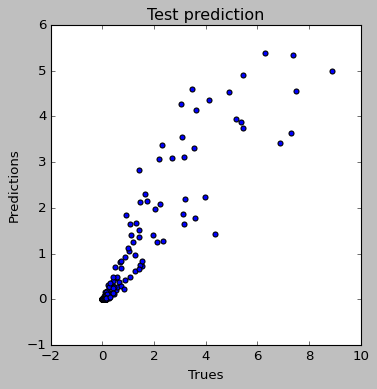

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [110]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [111]:
tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

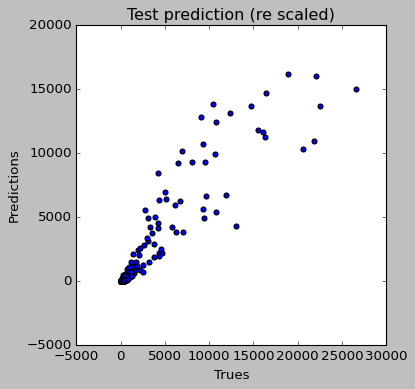

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

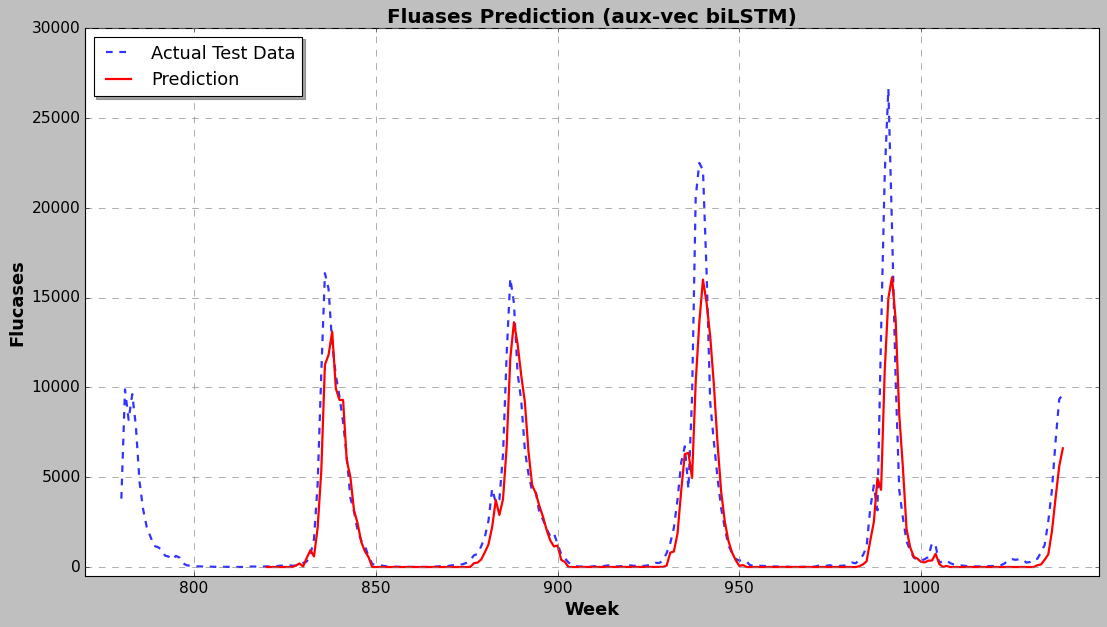

In [113]:
plt.figure(figsize=(14, 8))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=2, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length:], tst_preds, label="Prediction", linestyle='-', linewidth=2, color='red', alpha=1.0)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=16, fontweight='bold')
plt.ylabel("Flucases", fontsize=16, fontweight='bold')
plt.title("Fluases Prediction (aux-vec biLSTM)", fontsize=18, fontweight='bold')

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 凡例の調整
plt.legend(fontsize=16, loc='upper left', frameon=True, shadow=True)
plt.ylim(bottom=-500)
plt.xlim(left=min(test_steps) - 10, right = max(test_steps) + 10)

# 仕上げ
plt.tight_layout()
plt.savefig("Fluases Prediction (aux-vec biLSTM).jpg", dpi=200, bbox_inches='tight', format='jpg')
plt.show()

In [114]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [115]:
test_np[seq_length:,0].shape, tst_preds[:,0].shape

((220,), (220,))

In [116]:
reg_metric(test_np[seq_length:,0], tst_preds[:,0], "Flucases")

Flucases
MSE : 3998991.6007809946.
RMSE : 1999.7478843046677.
MAE : 848.3107737216083.
R2 : 0.8270282966650738.
pearson : 0.9263151531482705 2.2112172485539504e-94


In [117]:
np.save(exp_dir + "test_trues.npy", test_np)
np.save(exp_dir + "test_preds.npy", tst_preds)
np.save(exp_dir + "test_steps.npy", test_steps)

In [118]:
tst_preds.shape

(220, 1)

### 2. step by step prediction

In [119]:
init_dat = tst_dataset[0]

In [120]:
init_inputs, init_trues = init_dat

In [121]:
init_inputs, init_trues = init_inputs.cuda(), init_trues.cuda()
        
init_inputs = torch.reshape(init_inputs, (1, seq_length, init_inputs.shape[-1]))
init_trues = torch.reshape(init_trues, (1, 1, init_trues.shape[-1]))
input_c = torch.reshape(init_trues[:,:,-1], (init_trues.shape[0], 1))
        
preds = model(init_inputs, input_c)

In [122]:
preds_cat = torch.cat([preds, input_c], dim=1)

In [123]:
preds_cat = torch.reshape(preds_cat, (1, 1, preds_cat.shape[-1]))
preds_cat.shape

torch.Size([1, 1, 4])

In [141]:
stack_inputs = torch.cat([init_inputs, preds_cat], dim=1)

In [142]:
from torch.utils.data import TensorDataset, DataLoader

#test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

tst_input_tensor = torch.from_numpy(test_np[:,-1].reshape(-1,1).astype(np.float32)).clone()
tst_input_dataset = TensorDataset(tst_input_tensor)

In [143]:
bimodel.eval()

with torch.no_grad():
    for id, tst_input in enumerate(list(tst_input_dataset)[len(stack_inputs[0]):]):
        print(id)

        input_c = torch.reshape(tst_input[0], (tst_input[0].shape[0], 1)).cuda()

        preds = bimodel(stack_inputs[:,-seq_length:,:].cuda(), input_c.cuda())
        preds_cat = torch.cat([preds, input_c], dim=1)

        preds_cat = torch.reshape(preds_cat, (1, 1, preds_cat.shape[-1]))
        stack_inputs = torch.cat([stack_inputs, preds_cat], dim=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218


In [144]:
ae_scaled_preds = stack_inputs[0][:,0].to('cpu').detach().numpy().copy()

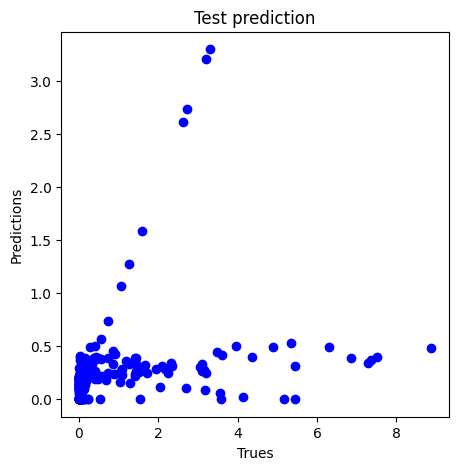

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_scaled_ts, ae_scaled_preds, c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [146]:
#rescaled_tst_trues = (np.array(test_scaled_ts) - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min
rescaled_tst_preds = (np.array(ae_scaled_preds) - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

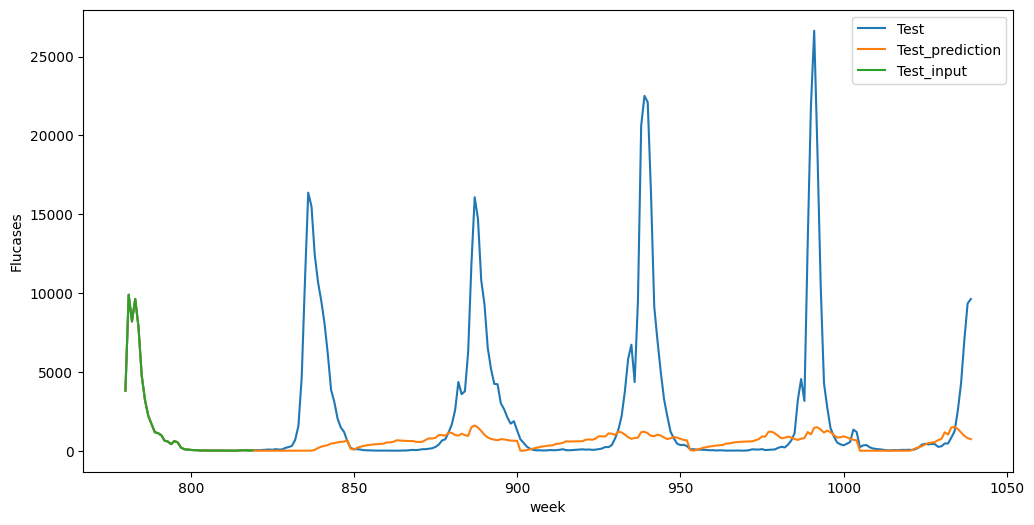

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n],label="Test")
plt.plot(test_steps, rescaled_tst_preds,label="Test_prediction")
plt.plot(test_steps[0:seq_length], rescaled_tst_preds[0:seq_length],label="Test_input")

plt.xlabel("week")
plt.ylabel("Flucases")
plt.legend()